In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
import ast

In [12]:
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\All_combined.csv")

In [13]:
df.head(5)

,web-scraper-order,web-scraper-start-url,Single,Single-href,Title,Price,Image-src,Color,Occassion,Type
0,1691784413-1,https://www.flipkart.com/search?q=Kurta%20for%...,NaN,https://www.flipkart.com/lamba-creations-women...,Women Printed Viscose Rayon Straight Kurta (B...,₹ 269,https://rukminim2.flixcart.com/image/832/832/k...,Black,Ethnic,Kurta
1,1691784416-2,https://www.flipkart.com/search?q=Kurta%20for%...,NaN,https://www.flipkart.com/vastani-enterprise-wo...,Women Embroidered Cotton Rayon Anarkali Kurta ...,₹ 419,https://rukminim2.flixcart.com/image/832/832/x...,Black,Ethnic,Kurta
2,1691784419-3,https://www.flipkart.com/search?q=Kurta%20for%...,NaN,https://www.flipkart.com/pristyle-women-floral...,Women Floral Print Cotton Blend Flared Kurta ...,₹ 429,https://rukminim2.flixcart.com/image/832/832/x...,Black,Ethnic,Kurta
3,1691784422-4,https://www.flipkart.com/search?q=Kurta%20for%...,NaN,https://www.flipkart.com/shree-ganesh-fashion-...,Women Embellished Cotton Rayon Flared Kurta (...,₹ 499,https://rukminim2.flixcart.com/image/832/832/l...,Black,Ethnic,Kurta
4,1691784425-5,https://www.flipkart.com/search?q=Kurta%20for%...,NaN,https://www.flipkart.com/sak-jaipur-women-prin...,Women Printed Viscose Rayon Straight Kurta (B...,₹ 270,https://rukminim2.flixcart.com/image/832/832/x...,Black,Ethnic,Kurta


In [14]:
print(df.columns)

Index(['web-scraper-order', 'web-scraper-start-url', 'Single', 'Single-href',
       'Title', 'Price', 'Image-src', 'Color', 'Occassion', 'Type'],
      dtype='object')


In [15]:
df['tags'] = df['Title'] + ' ' + df['Color'] + ' ' + df['Occassion']+ ' ' + df['Type']

In [16]:
# Testing Phase
# Sample purchase history data (item, color)
purchase_history = [
    ("red jacket", "red"),
    ("blue shorts", "blue"),
    ("black shoes", "black"),
    ("green hat", "green"),
    ("red dress", "red"),
    ("red shirt", "red"),
    ("red shoes", "red"),
    ("white gloves", "white"),
    ("red hat", "red"),
    # ... other purchase history items
]
purchase_keywords = [item.lower() for item, _ in purchase_history]

In [17]:
# Testing Phase
def matches_keywords(title):
    lower_title = title.lower()
    return any(keyword in lower_title for keyword in purchase_keywords)


In [18]:
# Filter products based on matching keywords
filtered_products = df[df['Title'].apply(matches_keywords)]

In [19]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('wordnet')

In [22]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [23]:
def preprocess(text):
    tokens = word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
    return ' '.join(stemmed_tokens)

In [26]:

def func(user_input):
  c=1
  df['new_tags'] = df['tags'].apply(preprocess)
  preprocessed_input = preprocess(user_input)
  keywords = preprocessed_input.split()
  df['Relevance'] = df['new_tags'].apply(lambda text: sum(keyword in text for keyword in keywords))
  filtered = df[df['Relevance'] > 0]

  flag=0
  sorted_recommendations = filtered.sort_values(by='Relevance', ascending=False)
  top_5_recommendations = sorted_recommendations.head(5)
  if not top_5_recommendations.empty:
      print("Top 5 recommendations are\n")
      for index, row in top_5_recommendations.iterrows():
          print(f"Title: {row['tags']}")
          if(flag==0):
            flag=1
            prompt=row['tags']
          print(f"Link: {row['Single-href']}")
        #  print(f"Discount: {row['Discount']}")
          print()
  else:
      print("\nNo matching kurtas found.")
  print("\nBased on your past purchases!!")
  for i, row in filtered_products.iterrows():
    if(c<=5):
      print()
      print(f"Title: {row['Title']}")
      print(f"Link: {row['Single-href']}")
     # print(f"Discount: {row['Discount']}")
      c=c+1
    else :
      break


  prompt=prompt.replace('(', '')
  prompt=prompt.replace(')', '')

In [27]:
user_input = input("\nEnter your preference: ")
print("Our Options are\n")
func(user_input)


Enter your preference: white blue saree
Our Options are

Top 5 recommendations are

Title: Floral Print Daily Wear Georgette Saree  (White, Light Blue) color Ethnic Saree
Link: https://www.flipkart.com/siril-floral-print-daily-wear-georgette-saree/p/itme65bde91c1d94?pid=SARGMF494HJTNGZV&lid=LSTSARGMF494HJTNGZVZSBQVT&marketplace=FLIPKART&q=Saree+party+wear+light+colors&store=clo%2F8on%2Fzpd%2F9og&srno=s_1_6&otracker=search&otracker1=search&iid=ec19ecd6-82b7-4bff-b1ca-889076469c41.SARGMF494HJTNGZV.SEARCH&ssid=s064sp8qn40000001691783196970&qH=21fa57338155b1ba

Title: Solid/Plain Handloom Pure Cotton Saree  (Blue, White) color Ethnic Saree
Link: https://www.flipkart.com/balika-bodhu-solid-plain-handloom-pure-cotton-saree/p/itm5729da05c736b?pid=SARGHX87ZEDGNVHW&lid=LSTSARGHX87ZEDGNVHWHL9QF4&marketplace=FLIPKART&q=saree+stylish&store=clo%2F8on%2Fzpd%2F9og&srno=s_1_3&otracker=search&otracker1=search&iid=b33256e4-c42c-4b0f-b275-7f7f55403f44.SARGHX87ZEDGNVHW.SEARCH&ssid=uvpy0vrqds0000001691784

In [29]:
! pip install min-dalle -q

In [ ]:
from min_dalle import MinDalle
model = MinDalle(is_mega=True, is_reusable=True)

using device cpu
intializing TextTokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder


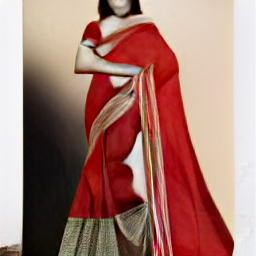

In [ ]:
seed = 6
grid_size = 1
display(model.generate_image(user_input, seed, grid_size))


















Yes or No
yes
Enter your preference: saree black for girls
Top 5 recommendations are

Title: Legging For Girls  (Black Pack of 2) Black Casual Ethnic Leggings
Link: https://www.flipkart.com/f-t-h-legging-girls/p/itmf64b88a1e1ccb?pid=KLGGGP3N5DARZ7D4&lid=LSTKLGGGP3N5DARZ7D4F7KV3B&marketplace=FLIPKART&q=Leggings+black&store=clo&srno=s_1_20&otracker=search&otracker1=search&iid=4643e03b-fa22-4107-b6d5-c0b9edfb884b.KLGGGP3N5DARZ7D4.SEARCH&ssid=si2ddy6l1c0000001691780818409&qH=be849b6116921fa1
Discount: Special PriceGet at flat ₹499T&CBank Offer5% Cashback on Flipkart Axis Bank CardT&CExtra ₹500 Off on Bikes & Scooters on purchase of ₹30,000 or moreT&CPartner OfferSign-up for Flipkart Pay Later & get free Times Prime Benefits worth ₹10,000*Know More

Title: Legging For Girls  (Black Pack of 3) Black Casual Ethnic Leggings
Link: https://www.flipkart.com/ariel-legging-girls/p/itmde0417345bcfd?pid=KLGG9F4NYEYPS7DC&lid=LSTKLGG9F4NYEYPS7DCHXJ1NC&marketplace=FLIPKART&q=Leggings+bl

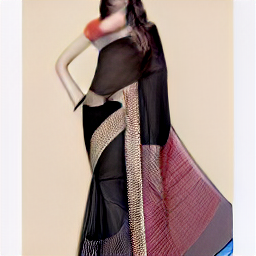

Okay thankyou


In [ ]:
br= "no"
while(br == "No" or br == "no"):
  br=input("\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nYes or No\n")
  user_input = input("Enter your preference: ")
  func(user_input)
  seed = 6
  grid_size = 1
  display(model.generate_image(user_input, seed, grid_size))

print("Okay thankyou")


In [ ]:
import pickle